In [1]:
# Import pandas and xgboost
import pandas as pd
from xgboost import XGBRegressor

In [3]:
# Import GDP data CSV
data = pd.read_csv("gdp.csv")
print(data)

        Date  gdp  Jobless  U of mich consumer sentiment  Last Price  (R1)  \
0    6/30/18  4.2      232                          99.0             79.44   
1    3/31/18  2.2      242                         100.1             70.27   
2   12/31/17  2.3      248                          98.2             66.87   
3    9/30/17  2.8      254                         101.4             57.54   
4    6/30/17  3.0      251                          95.9             47.92   
5    3/31/17  1.8      241                          95.1             52.83   
6   12/31/16  1.8      238                          95.1             56.82   
7    9/30/16  1.9      245                          96.9             49.06   
8    6/30/16  2.3      265                          98.2             49.68   
9    3/31/16  1.5      274                          91.2             39.60   
10  12/31/15  0.4      277                          93.5             37.28   
11   9/30/15  1.0      271                          91.0        

In [9]:
# Set up y as GDP, and X as the features to fit to (Initial Jobless Claims, UofMich Consumer Sentiment, and Brent Oil RSI and Moving Average.)
y = data["gdp"]
X = data.drop(["gdp", "Date", "Last Price  (R1)", "RSI 30 Day  (L1)", "RSI 14 Day  (L1)"], axis=1)
print(X)
print(y)

    Jobless  U of mich consumer sentiment      RSI  Moving Average
0       232                          99.0  54.2610         42.1719
1       242                         100.1  50.4824         41.0306
2       248                          98.2  49.0327         40.9813
3       254                         101.4  44.9241         41.5779
4       251                          95.9  40.3178         42.3516
5       241                          95.1  41.9819         43.5499
6       238                          95.1  43.3315         44.5738
7       245                          96.9  39.8389         45.3608
8       265                          98.2  40.0219         46.6142
9       274                          91.2  35.5527         47.8841
10      277                          93.5  34.5098         49.5062
11      271                          91.0  37.1805         50.9283
12      277                          92.6  41.2486         52.8291
13      269                          87.2  37.7233         54.

In [10]:
# Create and fit model using XGB regression
model = XGBRegressor()
model.fit(X, y)
predictions = model.predict(X)

In [11]:
print(predictions)

[ 3.7392027   2.7515697   2.3105547   2.6609545   2.6609545   1.9454312
  1.9454312   2.2354083   2.32099     1.3371227   0.93270504  1.3817
  2.718224    2.7468839   2.6444576   4.122818    4.385527    0.49390042
  2.4315138   2.8000546   0.58227044  3.3888712   1.1441786   1.6371088
  2.2490473   2.9302819   3.2618527   0.93683755  2.3903117  -0.22520012
  1.7378479   2.48764     3.5814302   2.0519972   3.6187112   1.5684903
 -0.5619261  -4.323552   -8.004201   -2.0495389   1.6431091  -1.3880271
  2.3509686   2.236276    2.3264444   0.96274287  2.9270935   1.3927388
  0.948438    4.8402123   2.7054589   2.916967    2.679634    3.5889444
  3.8171134   3.8566387   3.5466251   3.207637    4.443386    5.612357
  3.3058794   2.2498589   0.9302906   1.476801    2.485177    3.3707747
  1.3874865  -1.2900838   1.8050448  -0.41723734  3.245238    0.8721335
  6.798295    2.4861088   6.0708985   5.3810143   3.750569    3.78925
  6.0144725   4.323953    4.2323174   4.2755985   4.141724    4.8616

In [7]:
# Import test metrics from sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [12]:
# Calculate and print out the calculated errors
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y)))

Mean Absolute Error : 0.4868133592900334
Mean Squared Error : 0.38874175322373666


In [16]:
# Create pipeline for reusablility purposes
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), XGBRegressor())

In [17]:
# Fit pipeline
my_pipeline.fit(X, y)
predictions = my_pipeline.predict(X)

In [13]:
# Check what significance each feature has on the model
print(model.feature_importances_)

[0.32038835 0.24433658 0.24919094 0.18608414]


In [26]:
# Import more insight tools from sklearn
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor 

In [27]:
# Trying sklearns gradient boosting model
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

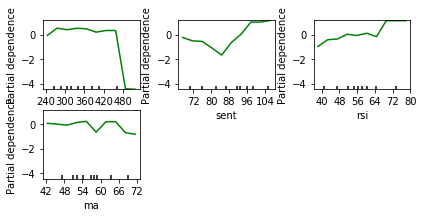

In [44]:
# Printing partial dependency plots from the sklearn version
my_plots = plot_partial_dependence(my_model,       
                                   features=[0,1,2,3], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['job', 'sent', 'rsi', 'ma'], # labels on graphs
                                   grid_resolution=10)

### 